# Scientific Programming with Python 
## Assignment 2 - 2025W

**Associate Prof. Dr. Sascha Hunold** \
Research Group for Parallel Computing \
Faculty of Informatics \
TU Wien

## Student data (FILL OUT)

1. Shakira Fibi Pannier (12509817)
2. Stefan Moser (12025955)
3. Full Name (Student ID) of Student3


In [37]:
from sympy.physics.control.control_plots import matplotlib
# this makes sure that plots will be inserted inline
%matplotlib inline

# Task 1 (8 points ) - RGB Color Intensity of Photos

## Context
- We work with an image of the a Cray 1 machine (https://www.flickr.com/photos/llnl/4886020817/in/photostream/lightbox/).
- The provided Python code reads in an RGB image. The resulting array `im` contains the RGB (red, green, blue) values for each pixel of this image. The image uses 8 bits per color channel, and thus, each color value is in the range of [0,255] (datatype `numpy.uint8`).
- The image contains $m$ rows and $n$ columns. Each pixel is represented by three values (R, G, and B): $p_{k,l,R}$, $p_{k,l,G}$, $p_{k,l,B} \in [0,255]$, where $0 \le k < m$ and $0 \le l < n$.
- You also have three color sliders (widgets) to change the color intensity of each pixel. Each slider value, i.e., $c_R$, $c_G$, $c_B$, represents the current adjustment value for each color channel, where $-255 \le c_R, c_G, c_B \le 255$. When a channel $C_i, i \in \{R,G,B\}$ should be adjusted, we compute the new color value of each pixel as (here shown for the R channel):
$$
\forall 0 \le l < n, 0 \le k <m: p_{k,l,R} = \max\{ 0, \min\{ p_{k,l,R} + c_R, 255 \} \}  \quad . 
$$ (In other words: We add the adjustment value to the channel of each pixel and ensure that the new value is $\ge 0$ and $\le 255$.) The computations for the new values for the Green ($p_{k,l,G}$) and Blue ($p_{k,l,B}$) channels are analogous.

## Tasks
- Use `ipywidgets` to add widgets: insert three `IntSliders`, one for each color (Red, Green, Blue). The values for each slider should be in $[-255,255]$.
- When a slider is adjusted, your code should adjust the intensity of the respective color channel. For example, if you change the Red slider, the Red channel of the image gets recomputed using the fomulas above. The image should be updated whenever a slider value is changed. The updated image should be plotted below the color slides and should have the following size: `figsize = (8,8)`.

## Hints
- To pass the current image to the `interact` function, you can use `im=fixed(im)`.
- You have to be careful with the resulting datatypes. For example, the maximum value representable by `numpy.uint8` is `255`. So, if your current pixel has a red color value of `200` and the adjustment value is `+200`, then the resulting value must be `255`. You cannot store `400` as a pixel value and then compute the minimum value of `255` and `400`, as `400` cannot be stored in this datatype.
- There is a `numpy` function `numpy.putmask` might be helpful, but there are also other ways to solve this task using `numpy`.
- Although the input values are stored as `numpy.uint8`, you may use datatypes of your choice for solving the problem.
- As always, you may use any library that you can install with `pip` on our JupyterHub server.

- The widgets and the image should look like this:

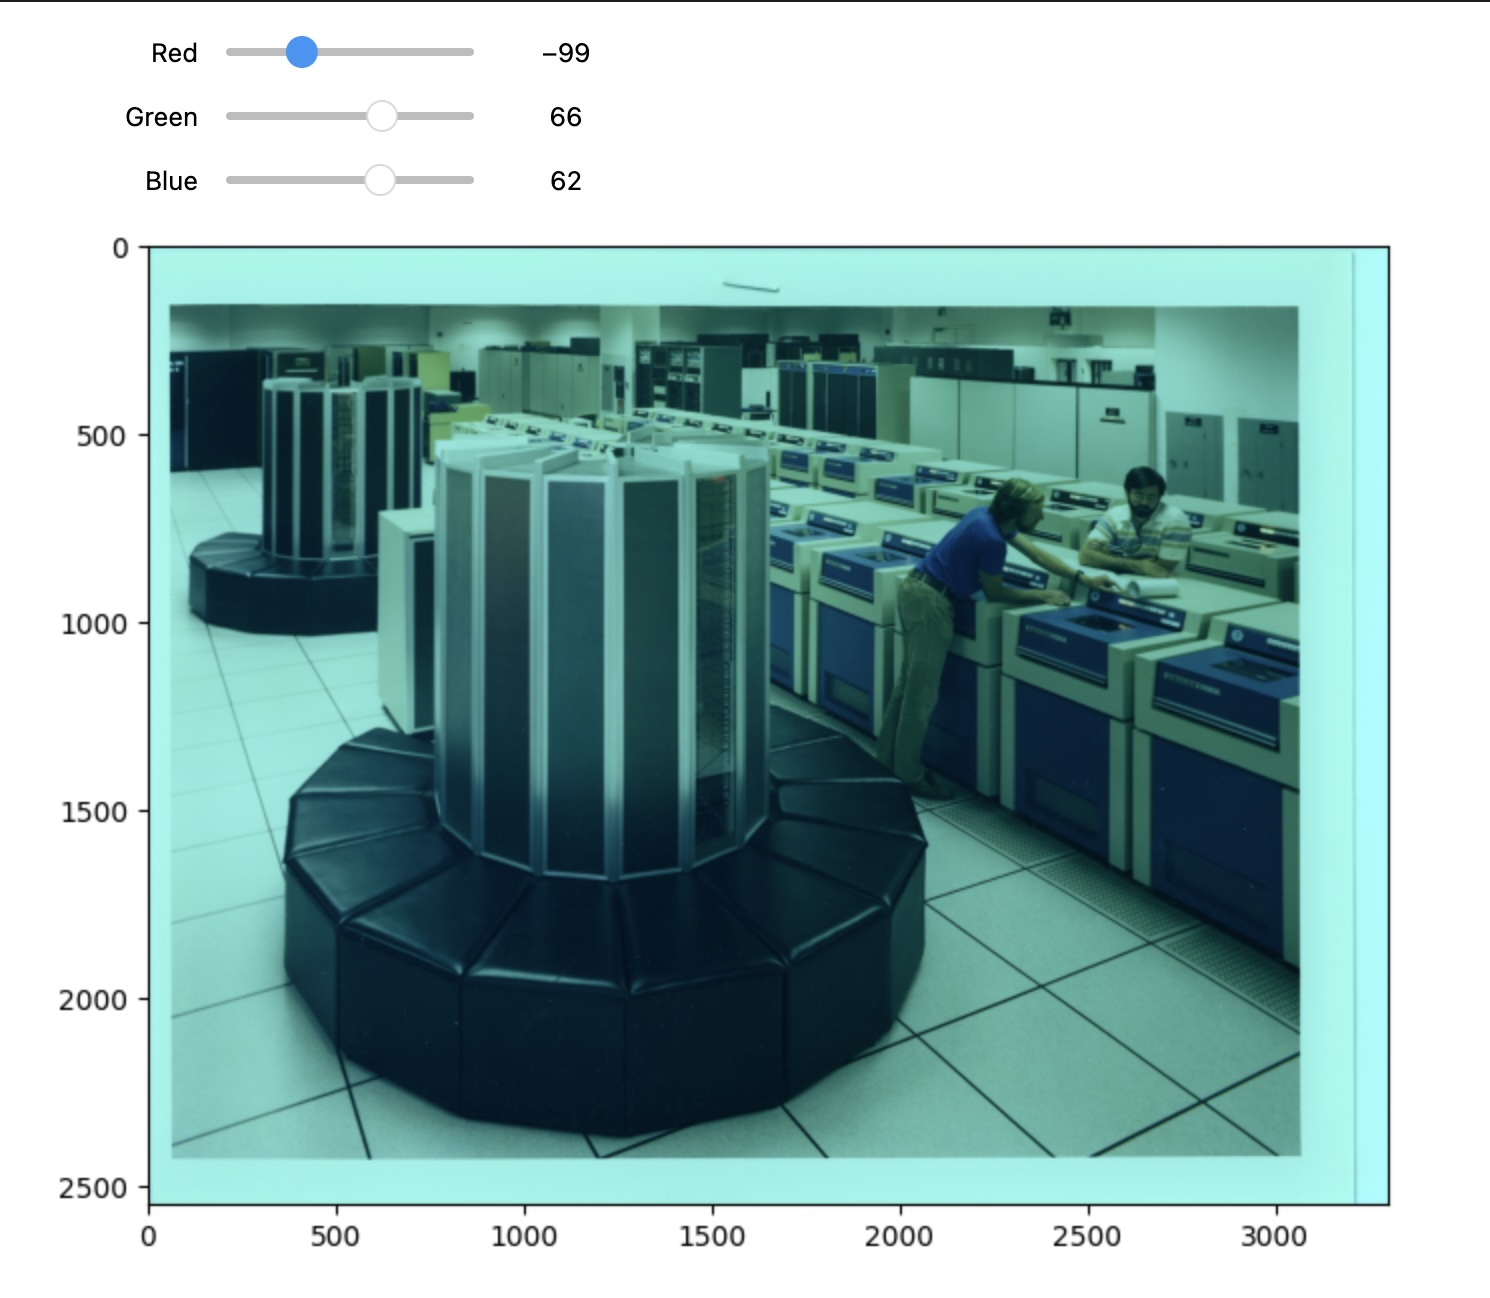

In [38]:
from IPython.display import Image, display

display(Image(filename="../assignment2/shared/shared/191.125-2025W/assignment2/image_channels.jpg", width=600))
#display(Image(filename="/home/jovyan/shared/191.125-2025W/assignment2/image_channels.jpg", width=600))

In [39]:
from ipywidgets import widgets, interact, fixed
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np

im = imageio.imread('../assignment2/shared/shared/191.125-2025W/assignment2/cray1.jpg', pilmode="RGB")
#im = imageio.imread('/home/jovyan/shared/191.125-2025W/assignment2/cray1.jpg', pilmode="RGB")
im = im.astype(np.int16)

# use this code to plot the image in the interact code
#plt.figure(figsize = (8,8))
#plt.imshow(im)

colours = ['red', 'green', 'blue']
sliders = {key: widgets.IntSlider(min=-255, max=255, step=1, value=0) for key in colours}


def adjust_colour(Red, Green, Blue, im):
    im_adj = im.copy()
    im_adj[:, :, 0] = np.clip(im_adj[:, :, 0] + Red, 0, 255)
    im_adj[:, :, 1] = np.clip(im_adj[:, :, 1] + Green, 0, 255)
    im_adj[:, :, 2] = np.clip(im_adj[:, :, 2] + Blue, 0, 255)

    plt.figure(figsize=(8, 8))
    plt.imshow(im_adj.astype(np.uint8))
    plt.show()


interact(adjust_colour,
         Red=sliders['red'],
         Green=sliders['green'],
         Blue=sliders['blue'],
         im=fixed(im));



interactive(children=(IntSlider(value=0, description='Red', max=255, min=-255), IntSlider(value=0, description…

# Task 2 (6 points) - Using `sympy` to determine the area under the curve

## Context
We now use `sympy` to compute the total **closed area** between the x axis and a function (above the x axis). If there is no such closed above the x axis area, then we define the area to be `-1`. 
To put it differently, each piece of the overall area must be bounded by two roots of the function. 

Please notice that we are only interested in the closes areas above the x axis. As indicated
in the example below (`area_example.png`), only areas marked in blue, which are bounded by two roots of the
function, should be computed. Note that the figure shown below is an example that was not plotted with Python. 
The image serves illustration purposes.

## Tasks
1. Implement the function `plot_function(f)` using `sympy`. You do not need to paint/fill the closed area.
   Simply plot the function and use the following boundaries:
   - For the y axis, use the range `[-8, 8]`.
   - For the x axis:
       - left  bound: 
           - if $x_l$ denotes the smallest root of function $f$ then the left bound is $\lceil x_l - 2\rceil$
           - if there is no root, use `-5`
       - right bound: 
           - if $x_l$ denotes the largest root of function $f$ then the left bound is $\lceil x_l + 2\rceil$
           - if there is no root, use `5`
       
   
2. Implement the function `compute_area(f)`, which computes the total closed area between the function and the x-axis. The function `compute_area(f)` should in principal work for an arbitrary polynomial function that depends on $x$. 
  We will primarily base our checks on the six provided functions below. However, we may also test a few other polynomials.
  Note that your code only needs to work for functions for which `sympy` can find real number roots.

## Hints
- You may first find the roots of a function and then compute the area.
- For each function, create a separate plot.
- We are interested in the sum of closed areas.
- The example (plot) above was created with another plotting program, which I simply used to easily color the closed area in plot. You DO NOT have to color (fill) the closed areas in your plots (you may do this of course, but it won't give you any points). Thus, a simple lineplot for the function will do.


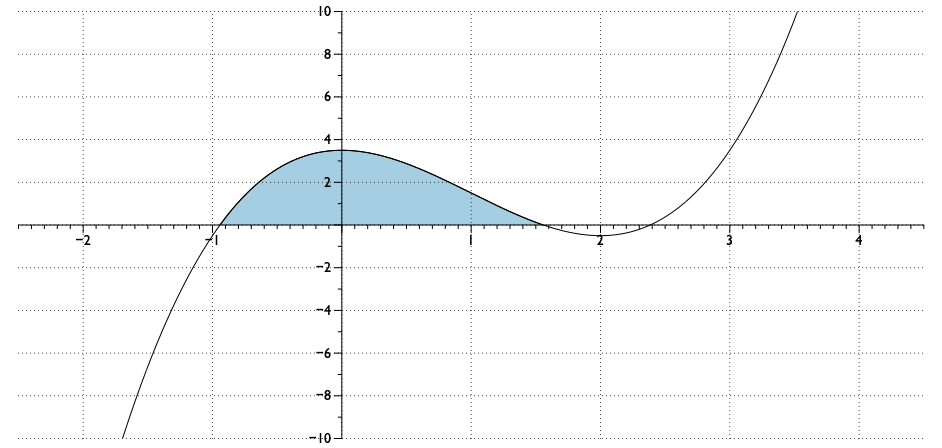

In [40]:
from IPython.display import Image, display

#display(Image(filename="/home/jovyan/shared/191.125-2025W/assignment2/area_example.png", width=600))
display(Image(filename="../assignment2/shared/shared/191.125-2025W/assignment2/area_example.png", width=600))

In [41]:

import sympy


def find_roots(f):
    roots = sympy.polys.polytools.real_roots(f, x)
    return roots


def compute_area(f):
    """
    :param f: sympy function
    :returns: area under the curve as 'float'
    """
    area = -1.0
    A = 0
    roots = find_roots(f)
    roots = [float(r) for r in roots]
    if len(roots) > 1:
        for i in range(len(roots) - 1):
            a = sympy.integrate(f, (x, roots[i], roots[i + 1]))
            if a > 0:
                A += a
    if A > 0:
        area = A
    return area


def plot_function(f):
    roots = find_roots(f)
    if not len(roots) == 0:
        x_min = min(roots) - 2
        x_max = max(roots) + 2
    else:
        x_min = -5
        x_max = 5
    sympy.plotting.plot(f, xlim=(x_min, x_max), ylim=(-8, 8))
    pass


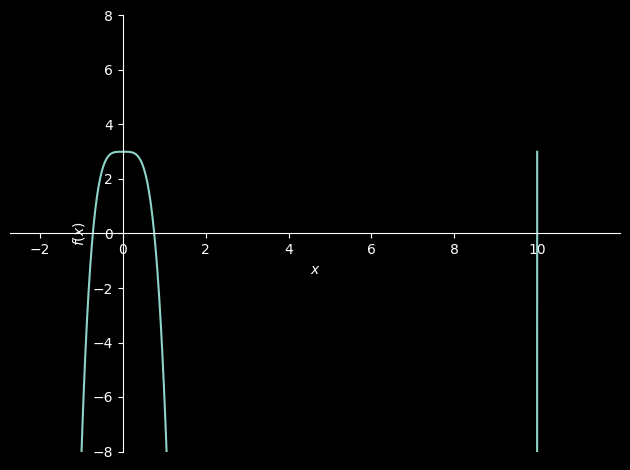

area under the curve: 3.55545700598787


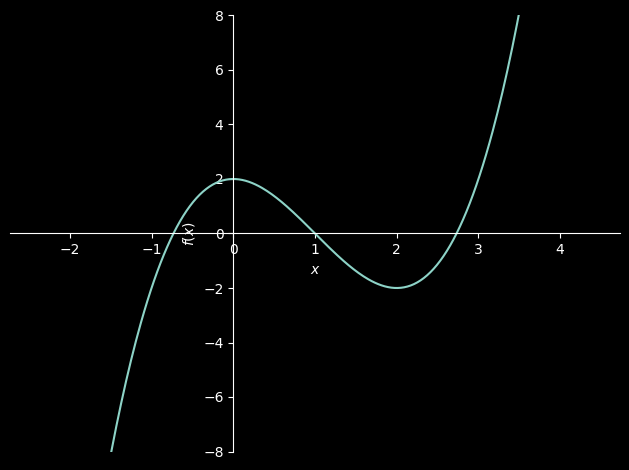

area under the curve: 2.25000000000000


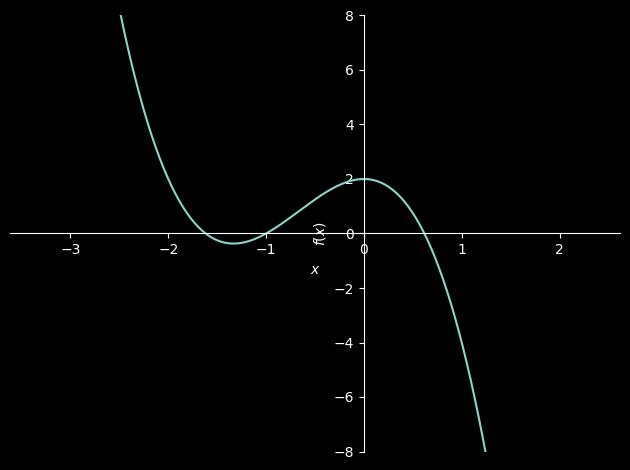

area under the curve: 2.01502832395825


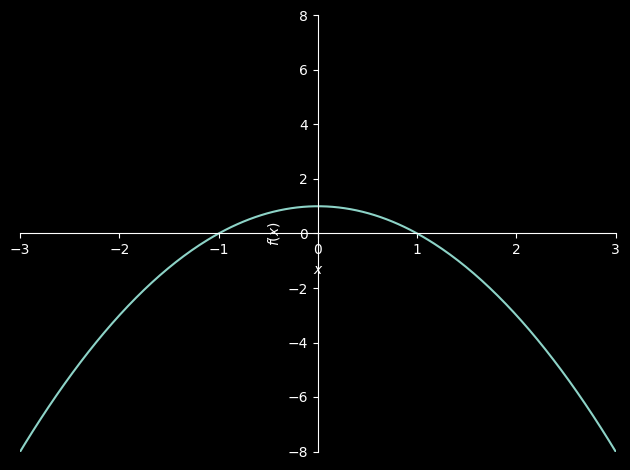

area under the curve: 1.33333333333333


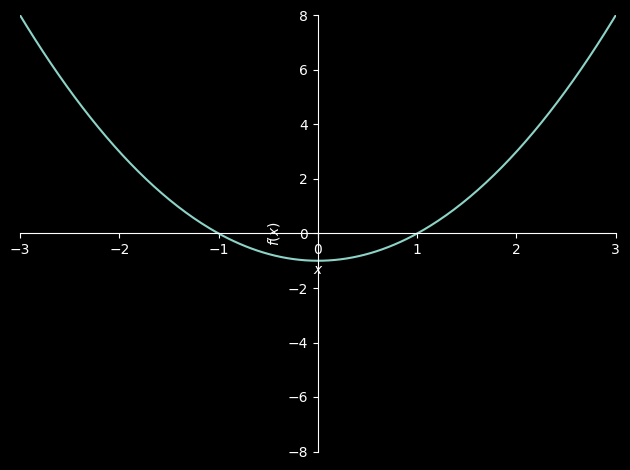

area under the curve: -1.0


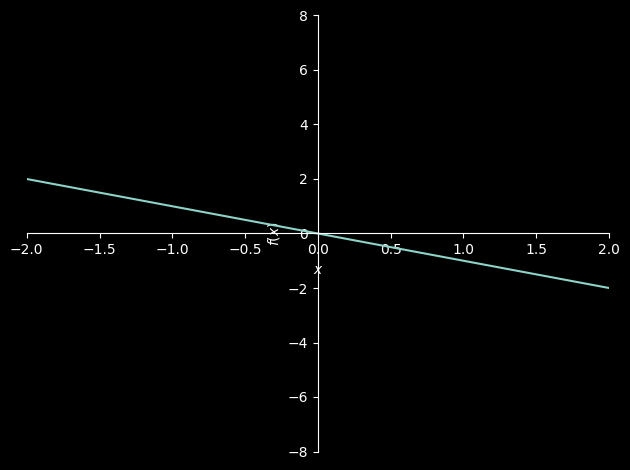

area under the curve: -1.0


In [42]:
x = sympy.symbols("x", real=True)

#f1 = x**5 - 10*x**4 + 30*x**3 - 50*x**2 + 24*x
f1 = x ** 5 + - 10 * x ** 4 + 3
f2 = 1 * x ** 3 - 3 * x ** 2 + 2
f3 = -2 * x ** 3 - 4 * x ** 2 + 2
f4 = -x ** 2 + 1
f5 = x ** 2 - 1
f6 = -x

for f in [f1, f2, f3, f4, f5, f6]:
    plot_function(f)
    print("area under the curve:", compute_area(f))

# Task 3 (6 Points) - OO Programming

Your task is to implement classes `Shape`, `Rectangle`, and `Circle`.
You are given the following specification:
- A Rectangle has the properties `width` (`int`), `height` (`int`), and `color` (`str`).
- A Circle has the properties `radius` (`float`) and `color` (`str`).
- The properties should be passed to the classes in the constructor.
- The color string must specify a valid color of `matplotlib` (see https://matplotlib.org/3.1.1/tutorials/colors/colors.html).

`Circle` and `Rectangle` inherit from class `Shape`, which is an abstract class that should not be used for plotting. Therefore, `Shape` will be a superclass of `Circle` and `Rectangle`. `Shape` should declare the methods `getArea()` and `getPlot(x,y)` to be `@abstractmethod`s. 

`Shape` should provide a method `getColor()`, which is then inherited by all subclasses, i.e., by `Circle` and `Rectangle`:
* `getColor()`: returns the color of the current shape.

`Rectangle` and `Circle` should implement the following methods:
* `__init__(...)`: Objects should be created with their instance variables initialized, e.g., `rectangle1 = Rectangle(10,5,'black')`
* `getArea()`:  returns the area of the current shape.
* `getPlot(x, y)`: returns a `pyplot` of the current shape. The parameters of the method define the `x` and `y` coordinates of the current shape (which is the bottom left corner in case of rectangles).
* `__str__()`: the string function returns the dimensions of the current shape, e.g., for a `Rectangle`: `"w: 10, h: 5"` and for a `Circle`: `"r: 5"`

## Hints 
- `ShapePrinter` is a provided class that can be used to test if your code works correctly.
- for more information about the `ABC` class, see https://docs.python.org/3/library/abc.html
- the method `getPlot(x, y)` should simply plot the current object, e.g., for a circle it may be `return plt.Circle(x, y, radius=2)` (this is an example, you will have to modify this slightly)

In [43]:
from abc import ABC, abstractmethod
import math
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.colors import is_color_like

In [44]:
class Shape(ABC):
    @abstractmethod
    def getArea(self):
        pass

    @abstractmethod
    def getPlot(self, x, y):
        pass

    def getColor(self):
        return self.color


class Circle(Shape):

    def __init__(self, radius: float, color: str):
        self.radius = radius
        if not is_color_like(color):
            raise ValueError("Invalid color string for Circle")
        self.color = color

    def getArea(self):
        return math.pi * (self.radius ** 2)

    def getPlot(self, x, y):
        return plt.Circle((x, y), self.radius, color=self.color)

    def __str__(self):
        return "r: {}".format(self.radius)


class Rectangle(Shape):

    def __init__(self, width: int, height: int, color: str):
        self.width = width
        self.height = height
        if not is_color_like(color):
            raise ValueError("Invalid color string for Circle")
        self.color = color

    def getArea(self):
        return self.width * self.height

    def getPlot(self, x, y):
        return plt.Rectangle((x, y), self.width, self.height, color=self.color)

    def __str__(self):
        return "w: {}, h: {}".format(self.width, self.height)




| Shape | Dimensions | Area | Color|
|---|---|---|---|
|Rectangle |w: 40, h: 20 |800|lightblue|
|Rectangle |w: 40, h: 1 |40|green|
|Circle |r: 3 |28.27|yellow|
|Rectangle |w: 3, h: 8 |24|brown|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Rectangle |w: 3, h: 8 |24|brown|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|
|Circle |r: 2 |12.57|green|


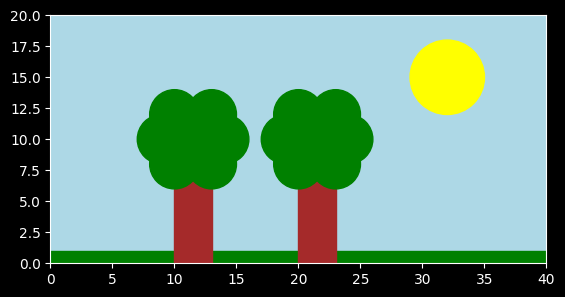

In [45]:
# This code below is to see if your implemented code works
# Do not change the following piece of code.

class ShapePrinter():
    def __init__(self, xlim, ylim):
        self.fig = plt.figure()
        self.markdown = "| Shape | Dimensions | Area | Color|\n|---|---|---|---|\n"

        self.ax = self.fig.add_subplot(1, 1, 1)
        self.ax.set_xlim(xlim)
        self.ax.set_ylim(ylim)
        self.ax.set_aspect('equal', adjustable='box')

    def addShape(self, shape, x, y):
        plot = shape.getPlot(x, y)
        self.ax.add_patch(plot)
        self.markdown += '|{} |{} |{}|{}|\n'.format(type(shape).__name__, shape, round(shape.getArea(), 2),
                                                    shape.getColor())

    def printTable(self):
        display(Markdown(self.markdown))


# Instantiation
leaf = Circle(2, 'green')
sun = Circle(3, 'yellow')
trunk = Rectangle(3, 8, 'brown')
sky = Rectangle(40, 20, 'lightblue')
lawn = Rectangle(40, 1, 'green')

printer = ShapePrinter([0, 40], [0, 20])
# Sky
printer.addShape(sky, 0, 0)
# Lawn
printer.addShape(lawn, 0, 0)
# Sun
printer.addShape(sun, 32, 15)

# Tree 1
xpos = 20
printer.addShape(trunk, xpos, 0)
printer.addShape(leaf, xpos, 8)
printer.addShape(leaf, xpos, 12)
printer.addShape(leaf, xpos + 3, 8)
printer.addShape(leaf, xpos + 3, 12)
printer.addShape(leaf, xpos - 1, 10)
printer.addShape(leaf, xpos + 4, 10)
printer.addShape(leaf, xpos + 2, 10)
# Tree 2
xpos = 10
printer.addShape(trunk, xpos, 0)
printer.addShape(leaf, xpos, 8)
printer.addShape(leaf, xpos, 12)
printer.addShape(leaf, xpos + 3, 8)
printer.addShape(leaf, xpos + 3, 12)
printer.addShape(leaf, xpos - 1, 10)
printer.addShape(leaf, xpos + 4, 10)
printer.addShape(leaf, xpos + 2, 10)

printer.printTable()

# Task 4 (4 + 2 + 2 points) - Matrix Formats + Unit Testing + Storage Requirements

Sparse matrices play an important role in scientific computing. There are several ways of storing sparse matrices that require less memory than storing all $n^2$ elements.

One of these storage formats for sparse matrices is the **Compressed Sparse Row Format (CSR)**.
For an example and a description, see https://docs.nvidia.com/cuda/cusparse/index.html#csr-format.

## Task 4.1 Matrix Generation and CSR Conversion

Now, you should complete the following two sub-tasks:
1. implement a sparse matrix generator, and
2. implement a function to convert a sparse matrix into the CSR format.

### 4.1.1 Sparse Matrix Generator

- Implement class `MySparseMatrixGenerator` that inherits from `AbstractSparseMatrixGenerator`
- In the inherited class implement the function `generate_matrix(self, n, perc_non_zeros=0.1)`
    - `n` is the dimension of the matrix (we work with square matrices)
    - `perc_non_zeros` defines the percentage of non-zero elements as a value betwen `0.0` and `1.0`
    - the function must return a square `nxn` matrix of type `np.ndarray` (from `numpy`)
    - every non-zero matrix entry should be sampled using `np.random.uniform()`
    - `perc_non_zeros` is a lower bound of the actual ratio of non zeros elements. Thus, we are looking for the smallest number of non-zero elements $z$ for which $\frac{z}{n^2} \ge $ `perc_non_zeros` holds.
    
### 4.1.2 Convert to CSR Format

The sparse matrix generator that you have implemented creates sparse matrices with $O(n^2)$ storage, regardless of the number of non-zeros, as we store all values in a `nxn` array of type `np.ndarray`.

Implement the function `convert_to_csr(matrix)`, which takes an `nxn` matrix of type `np.ndarray` and converts it into a matrix of type `MyCSRFormat`.

You should implement this function yourself, i.e., you should not use `cuSPARSE`.

In [46]:
import numpy as np
from abc import ABC, abstractmethod


class MyCSRFormat():

    def __init__(self, n, vals, col_idx, row_ptr):
        self.n = n
        self.vals = vals
        self.col_idx = col_idx
        self.row_ptr = row_ptr

    def __str__(self):
        s = ""
        s += "MyCSRFormat\n"
        s += "vals: "
        for i in range(len(self.vals)):
            s += str(self.vals[i]) + " "
        s += "\n"
        s += "col_idx: "
        for i in range(len(self.col_idx)):
            s += str(self.col_idx[i]) + " "
        s += "\n"
        s += "row_ptr: "
        for i in range(len(self.row_ptr)):
            s += str(self.row_ptr[i]) + " "
        s += "\n"
        return s

    def get_size(self):
        # you may need to adjust this code depending on your generation method
        return sys.getsizeof(self.vals) + sys.getsizeof(self.col_idx) + sys.getsizeof(self.row_ptr)


class AbstractSparseMatrixGenerator(ABC):
    def __init__(self):
        pass

    @abstractmethod
    def generate_matrix(self, n, perc_non_zeros=0.1):
        pass

In [47]:
class MySparseMatrixGenerator(AbstractSparseMatrixGenerator):
    # implement this class                                  
    def generate_matrix(self, n: int, perc_non_zeros=0.1) -> np.ndarray:
        matrix = np.zeros((n, n))
        num_non_zeros = int(np.ceil(perc_non_zeros * n * n))
        indices = np.random.choice(n * n, num_non_zeros, replace=False)
        for index in indices:
            row = index // n
            col = index % n
            matrix[row, col] = np.random.uniform()
        return matrix


def convert_to_csr(matrix):
    # implement this function
    n_rows, n_cols = matrix.shape
    vals = []
    col_idx = []
    row_ptr = [0]

    for i in range(n_rows):
        row_count = 0
        for j in range(n_cols):
            v = matrix[i, j]
            if v != 0:
                vals.append(float(v))
                col_idx.append(int(j))
                row_count += 1
        row_ptr.append(row_ptr[-1] + row_count)

    vals_arr = np.array(vals)
    col_idx_arr = np.array(col_idx, dtype=int)
    row_ptr_arr = np.array(row_ptr, dtype=int)

    return MyCSRFormat(n_rows, vals_arr, col_idx_arr, row_ptr_arr)


generator = MySparseMatrixGenerator()
matrix = generator.generate_matrix(5, 0.3)

test_matrix = np.array([[1, 0, 2, 0], [0, 3, 0, 0], [4, 5, 0, 0], [0, 6, 7, 8]])
csr_matrix = convert_to_csr(test_matrix)
print(csr_matrix)

MyCSRFormat
vals: 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 
col_idx: 0 2 1 0 1 1 2 3 
row_ptr: 0 2 3 5 8 



In [48]:
# this cell contains some of our test code, please ignore


## Task 4.2

You should implement 3 unit tests for checking your implementation of the sparse matrix generator and 3 unit test for the CSR conversion function.

In particular, implement the following test cases:

**TestMySparseMatrixGenerator**
- Test 1
    - create an instance of your sparse matrix generator 
    - generate a matrix
    - set `n=200` in your test
    - set `perc_non_zeros=0.2` in your test 
    - test return type of the generated matrix  
- Test 2
    - same generation procedure as above
    - test that dimensions are correct
- Test 3
    - same generation procedure as above
    - compare the percentage of non-zero elements in the matrix to the input percentage and make sure that it fulfills the definition from Task 4.1.1

**TestConverter**
- Test 1
    - generate matrix `n=200`, `perc_non_zeros=0.02`
    - count number of non-zeros in original matrix
    - convert matrix to CSR format
    - test that value array in CSR format has same number of non zeros as original matrix
- Test 2
    - same generation procedure as above
    - test length of row_ptr is one larger than `n`
- Test 3
    - same generation procedure as above
    - test length of col_idx has same number of non zeros as original matrix
    - and also that length of col_idx is same as length of values

In [49]:
import unittest


class TestMySparseMatrixGenerator(unittest.TestCase):

    # test the return tupe of generated matrix
    def test_return_type(self):
        # create instance of type MySparseMatrixGenerator()
        # generate a sparse matrix
        # check that return type is np.ndarray
        generator_type = MySparseMatrixGenerator()
        matrix_type = generator_type.generate_matrix(n=200, perc_non_zeros=0.2)
        self.assertIsInstance(matrix_type, np.ndarray)

    # test dimensions of generated matrix
    def test_dimensions(self):
        # create instance of type MySparseMatrixGenerator()
        # generate a matrix 
        # check that shape is as specified
        generator_dimensions = MySparseMatrixGenerator()
        matrix_dimension = generator_dimensions.generate_matrix(n=200, perc_non_zeros=0.2)
        self.assertEqual(matrix_dimension.shape, (200, 200))

    # test that generated matrix has 1% non-zero values
    def test_sparsity(self):
        # create instance of type MySparseMatrixGenerator()
        # generate a matrix 
        # count non zeros
        # compute ratio and compare ratio to specification
        generator_sparsity = MySparseMatrixGenerator()
        matrix_sparsity = generator_sparsity.generate_matrix(n=200, perc_non_zeros=0.2)
        num_non_zeros = np.count_nonzero(matrix_sparsity)
        ratio = num_non_zeros / (200 * 200)
        self.assertGreaterEqual(ratio, 0.2)


class TestConverter(unittest.TestCase):
    generator = MySparseMatrixGenerator()
    matrix = generator.generate_matrix(n=200, perc_non_zeros=0.02)
    csr = convert_to_csr(matrix)

    # number of nonzeros in original matrix and csr format must be equal
    def test_non_zeros(self):
        number_zeros = np.count_nonzero(self.matrix)
        self.assertEqual(len(self.csr.vals), number_zeros)

    # len of row_ptr should be one larger then dimension of original matrix
    def test_len_row_ptr(self):
        len_row_ptr = len(self.csr.row_ptr)
        self.assertEqual(len_row_ptr, self.matrix.shape[0] + 1)

    # len of col_idx must be equal to number of nonzero elements
    def test_len_col_idx(self):
        len_col_idx = len(self.csr.col_idx)
        len_vals = len(self.csr.vals)
        self.assertEqual(len_col_idx, len_vals)


if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_len_col_idx (__main__.TestConverter.test_len_col_idx) ... ok
test_len_row_ptr (__main__.TestConverter.test_len_row_ptr) ... ok
test_non_zeros (__main__.TestConverter.test_non_zeros) ... ok
test_dimensions (__main__.TestMySparseMatrixGenerator.test_dimensions) ... ok
test_return_type (__main__.TestMySparseMatrixGenerator.test_return_type) ... ok
test_sparsity (__main__.TestMySparseMatrixGenerator.test_sparsity) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.058s

OK


## Task 4.3

Last, we are looking for a plot to compare the storage requirements of sparse matrices of type `np.ndarray` and to matrices of type `MyCSRFormat`.

- Generate sparse matrices using your generator of size $n^2$, where $n=200$.
    - Generate matrices for the following values of `perc_non_zeros`: `[  0.02, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95 ]`
    - Compute the memory occupied by each of these matrices
- Convert the 4 matrices to the CSR format of type `MyCSRFormat`    
    - Retrieve the memory footprint of these matrices
- Provide the following plot
    - x axis: sparsity (the values from `perc_non_zeros`)
    - y axis: storage in KiB (kibibyte)
    - use lines and points in your plots (`marker="o"`)
    
### Comments

You may use the `sys.getsizeof(..)` function to retrieve the size of data structures. But this function may not always give you what you expect.
You can also estimate the storage requirements of matrices yourself using a formula. In this case, clearly state which data type you assume for each matrix/array element, which may be different for the individual arrays (e.g., the `col_idx` and the `vals` arrays are typically not of the same type).

We are not primarily looking for the exact number of Bytes that all matrices and arrays require in the Python interpreter.
Thus, you may simply sum up the space requirements of all matrix and array elements with respect to their data type. 
In general, we are more interested in a storage model, i.e., when are specialized data structures for storing sparse matrices beneficial in terms of space.

In [50]:
import sys

# fill your plotting code


# Task 5 (3 + 3 Points) - Python arXiv API

In this task, we use a Python API for accessing arXiv.

Your task is to implement the functions
- `get_article_ids(name, max_results=5)` and
- `create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf")`.    

## Specifications

`get_article_ids(name, max_results=5)`
- The function shold return a list of IDs (as `str`) that match the name given. The list should have atmost `max_results` entries. The list of results should be sorted by `arxiv.SortCriterion.SubmittedDate`.
- This function takes two inputs, `name` as `str` and `max_results` as `int` (`max_results` will never be larger than 20).
- The parameter `name` define the name of a person, e.g., "Jack Dongarra" or "Jack J. Dongarra" or "S. Hunold" or "Turing" or "Turing Alan" etc.
- We simply treat each substring of `name` as a separate name in the search query for arxiv. For example, the name `"Jack Dongarra"` gets translated to search query `"au:Jack AND au:Dongarra"`, and `"S. Hunold"` gets translated to `"au:S. AND au:Hunold"`.
- The ID of an article is the last part of an arXiv URL, e.g., the ID of `https://arxiv.org/abs/2302.11474` is `2302.11474`.


`create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf")`
- This function creates a PDF file called `pdf_name` in directory `pdf_dir`.
- This resulting PDF file contains all the first pages from the articles in `lst_ids`, and only the first pages.
- Thus, you will have to download each PDF file that correspond to the IDs in `lst_ids` (these IDs are always valid). Then you will need to extract the 1st page of each of these input files and write ONE resulting PDF file with all 1st pages (in the same order as given in lst_ids).
    - These temporary PDF files (the ones for `lst_ids`) should also be downloaded to `pdf_dir`.
    - IMPORTANT: A PDF file for a specific ID in `lst_ids` should only be downloaded if it does not exist in `pdf_dir` (i.e., cache your PDF files in `pdf_dir`).
    - The output file `pdf_name` should always be created, also if it already exists in `pdf_dir`. If a file with the same name exists, the file should be overwritten.

## Comments 
- We have solved both tasks using the `arxiv` and `PyPDF2` library. However, you may use libraries of your choice for solving this task.
- A sample output file can be found in `shared/191.125-2025W/assignment2/bar.pdf`.

In [51]:
# use these libraries or any other library that may help you
import subprocess

subprocess.check_call(['pip', 'install', 'arxiv'])
subprocess.check_call(['pip', 'install', 'PyPDF2'])

0

In [52]:
import arxiv
import PyPDF2
import os

In [53]:
def get_article_ids(name, max_results=5):
    try:
        #Create search query
        name_parts = name.split()
        query = " AND ".join("au:" + part for part in name_parts)

        # Construct API client
        client = arxiv.Client(num_retries=3)

        # Search for max_results most recent articles by name 
        search = arxiv.Search(
            query=query,
            max_results=max_results,
            sort_by=arxiv.SortCriterion.SubmittedDate,
        )

        #store results in list
        results = client.results(search)
        ids = []
        for result in results:
            ids.append(result.entry_id.split("/")[-1])
        return ids

    except Exception as e:
        print("Error while fetching articles: ", str(e))
        return []


def first_page_to_writer(source_path, pdf_writer):
    with open(source_path, "rb") as src_file:
        pdf_reader = PyPDF2.PdfReader(src_file)
        first_page = pdf_reader.pages[0]
        pdf_writer.add_page(first_page)


def create_first_pages_pdf(lst_ids, pdf_name="foo.pdf", pdf_dir="./pdf"):
    # Download pdf from arxiv
    client = arxiv.Client(num_retries=3)
    pdf_writer = PyPDF2.PdfWriter()
    output_path = f"{pdf_dir}/{pdf_name}"

    #Create output directory if it does not exist
    if not os.path.exists(pdf_dir):
        os.makedirs(pdf_dir)

    for id in lst_ids:
        path_name = f"{pdf_dir}/{id}.pdf"
        try:
            #PDF already exists, skip download
            first_page_to_writer(path_name, pdf_writer)
            continue
        except:
            #PDF does not exist, download it
            print(f"Downloading PDF for id {id}...")
            try:
                search = arxiv.Search(id_list=[id])
                result = next(client.results(search))
                result.download_pdf(dirpath=pdf_dir, filename=f"{id}.pdf")
                first_page_to_writer(f"{pdf_dir}/{id}.pdf", pdf_writer)
            except Exception as e:
                print(f"Error downloading PDF for id {id}: ", str(e))
                continue

    #Write to output pdf
    with open(output_path, 'wb') as f:
        pdf_writer.write(f)



In [54]:
ids = get_article_ids('Jack Dongarra', 4)
# should print ['2509.19618v1', '2509.07305v1', '2506.11277v1', '2411.12090v2']
print(ids)
# should produce a PDF file with the 1st page of the articles above
create_first_pages_pdf(ids, "bar.pdf", "./pdf_out")



['2509.19618v1', '2509.07305v1', '2506.11277v1', '2411.12090v2']
